In [1]:
import pybamm
pybamm.settings.heaviside_smoothing = 10
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from joblib import Parallel, delayed
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100
from scipy.optimize import root

from IPython.display import Audio
url = "https://proxy.notificationsounds.com/wake-up-tones/you-have-new-message-484/download/file-a1_ascendent-64kbps.mp3"
notify=Audio(url = url, autoplay = True)
#notify=Audio(filename = "/home/drmrfc/Downloads/echoed-ding-459.mp3", autoplay = True)
########## pickle commands for dumping and retrieving data #######
# filename = 'dogs'
# outfile = open(filename,'wb')
# pickle.dump(dogs_dict,outfile)
# outfile.close()
# infile = open(filename,'rb')
# data = pickle.load(infile)
# infile.close()

########### parallel computations command ####################
# data = Parallel(n_jobs=-1)(delayed(my_function)(i) for i in my_iterable)

# data set when at office 
#filename = '/home/drmrfc/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'
# data set when at home
filename = '/Users/michaelcornish/Dropbox/Career/2020 - 2023 Post Doc/LiSTAR/Data/Inhomogeneity/Inhomogeneity/LiS_SingleLayers/reworked_data'

In [2]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_1()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": V_initial_dis,
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, 10*int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

In [4]:
time = 3.3*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

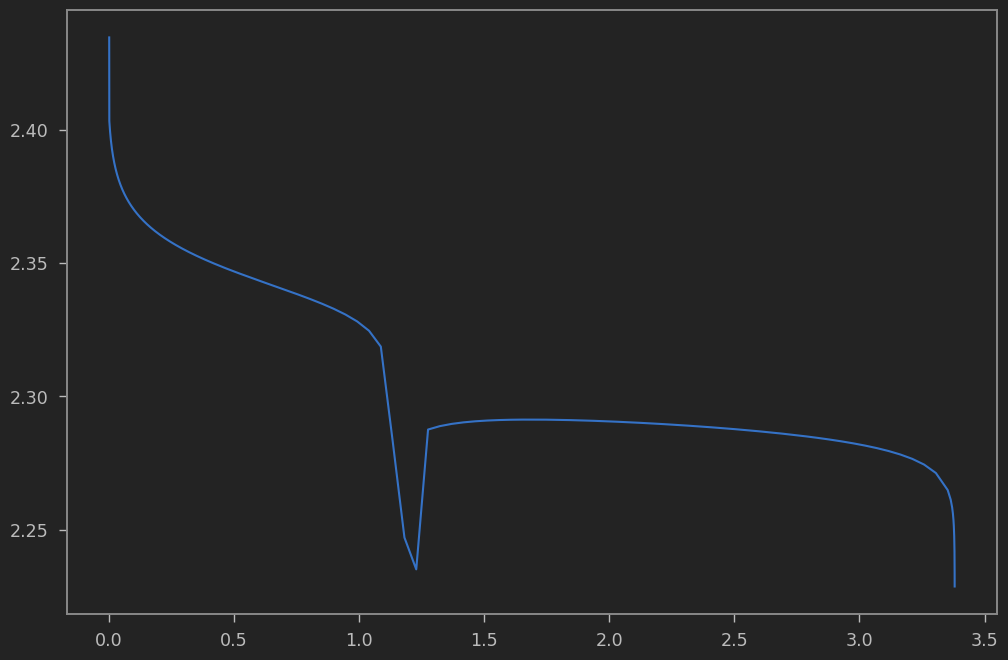

In [5]:
plt.plot(1.7*sim.solution.t/3600, sim.solution["Terminal voltage [V]"].entries)

Text(0, 0.5, 'Unfitted Resistance [Ohms]')

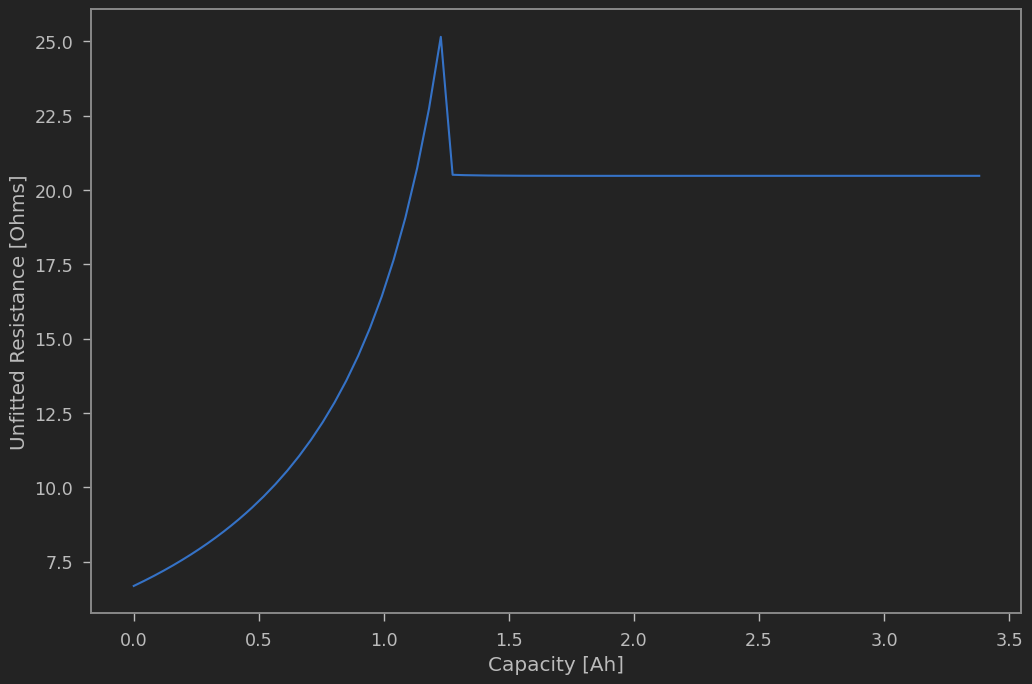

In [11]:
sigma_0 = 1
l =  1
A = 0.15

capacity = 1.7*sim.solution.t/3600
#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 
b = 1
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity,R)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Unfitted Resistance [Ohms]')

Text(0, 0.5, 'Li ion [g]')

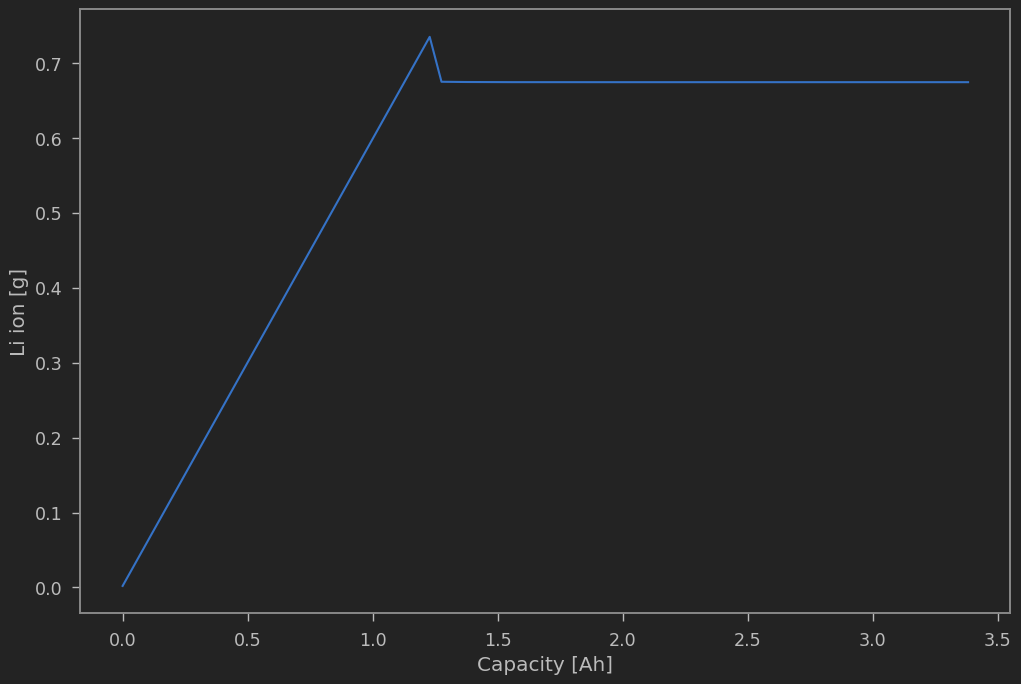

In [12]:
plt.plot(capacity,Li)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

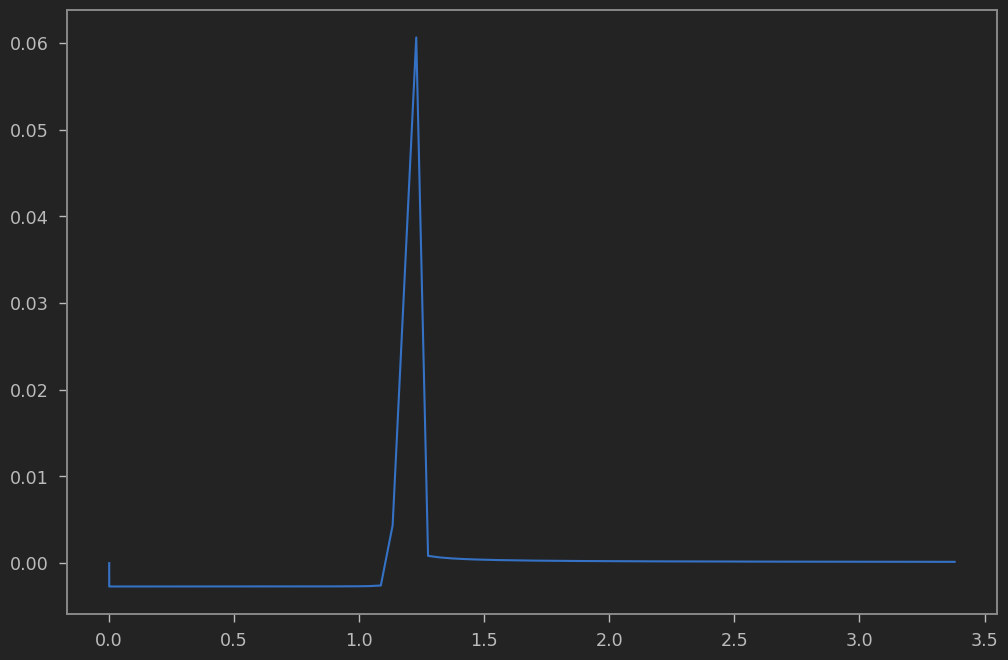

In [14]:
plt.plot(capacity,sim.solution['S [g]'].entries)

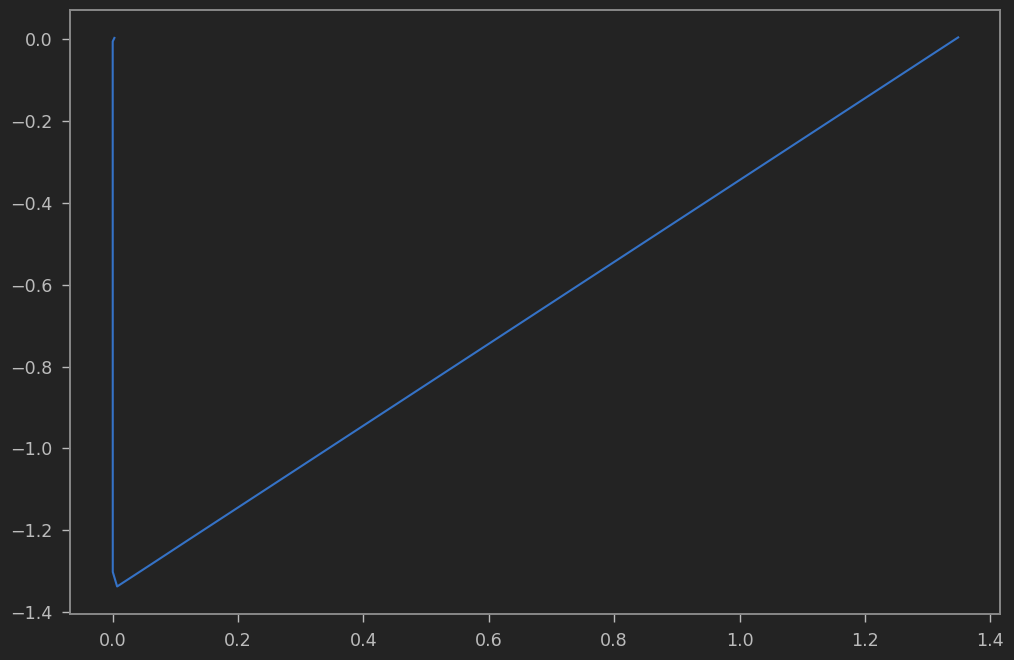

In [17]:
S2 = sim.solution["S2 [g]"].entries
S4 = sim.solution["S4 [g]"].entries
S2_theoretical = S2[0] + 0.5*(S4[0] - S4)
plt.plot(S2, S2_theoretical)

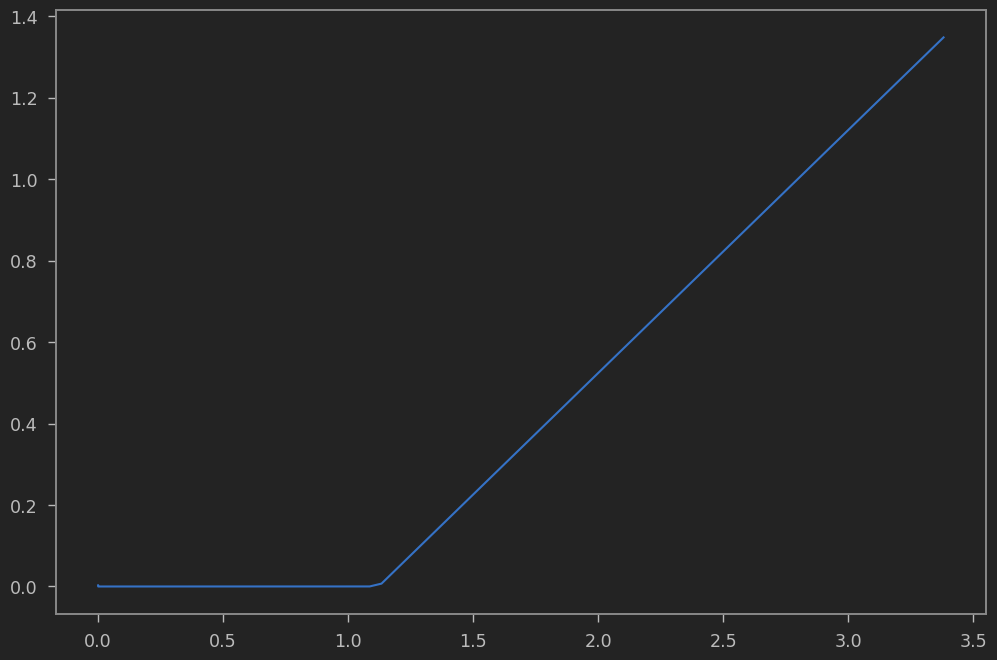

In [18]:
plt.plot(capacity, S2)

In [102]:
Ms = 32
F = 9.649e4

f_l = 0.0665
EL0 = 2.195
EH0 = 2.35
V = 2.4
R = 8.3145
T = 298
f_h = 0.7296
ih0 = 10
ar = 0.960
I = 1.7


def S4_func(S8):
    constant = 3600*3.4*Ms/F
    return constant - (3*S8/2)

def S2_func(S4, S1):
    constant = f_l*np.exp(4*F*(EL0-V)/(R*T))
    return constant*S4/(S1**2)

def S8_root(S8):
    S4 = S4_func(S8)
    EH = EH0 + (R*T)*np.log(f_h*S8/(S4**2))/(4*F)
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(4*F*eta_H/(2*R*T))
    return I - iH

In [103]:
# First find the root for S8

S8 = root(S8_root, 1e-4)
S8_initial = S8['x'][0]
S8_initial

2.6887870865850063

In [105]:
# Check root function is successful

S8_root(S8_initial)

1.5659296082048968e-10

In [106]:
# Second solve for S4 in terms of S4
S4_initial = S4_func(S8_initial)
S4_initial

0.026100124604820252

In [107]:
# capacity check

F*(1.5*S8_initial  + S4_initial)/(3600*Ms)

3.4000000000000004

In [108]:
orders = np.linspace(-10,-5,6)
S1_trials = 10**orders

S2_list = []
for S1 in S1_trials:
    S2 =  S2_func(S4_initial, S1)
    S2_list.append(S2)
    
S2_list

[2349.685035135339,
 23.49685035135339,
 0.2349685035135339,
 0.0023496850351353397,
 2.3496850351353395e-05,
 2.3496850351353388e-07]

In [137]:
# data for combined plot

data_dict = {}

In [180]:
loc = 6
print(S8_initial)
print(S4_initial)
print(S2_list[loc])
print(S1_trials[loc])

2.6887870865850063
0.026100124604820252


IndexError: list index out of range

In [174]:
# V = EL check
EL0 + (R*T)*np.log(f_l*S4_initial/((S1_trials[loc]**2)*S2_list[loc]))/(4*F)

2.4

In [175]:


model = pybamm.lithium_sulfur.ZeroD_Chemistry_1()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": V_initial_dis,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_list[loc],
        "Initial Condition for S ion [g]" : S1_trials[loc],
        "Lower voltage cut-off [V]" : 2.1,
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        #dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 1000#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

In [176]:
time = 3.39*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed
psetup failed: .../c

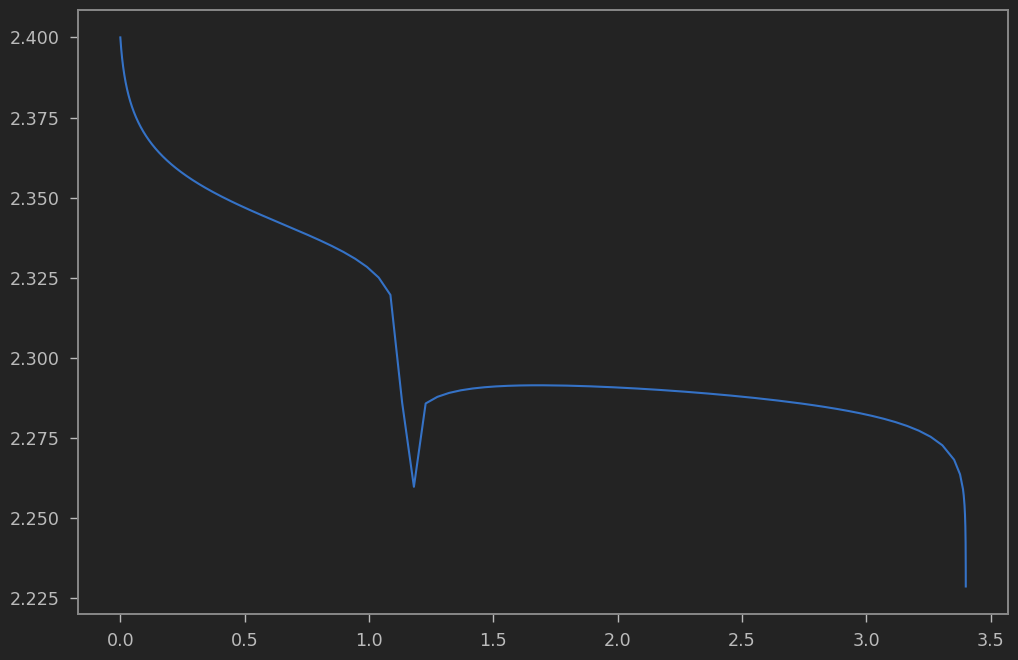

In [177]:
capacity = 1.7*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)

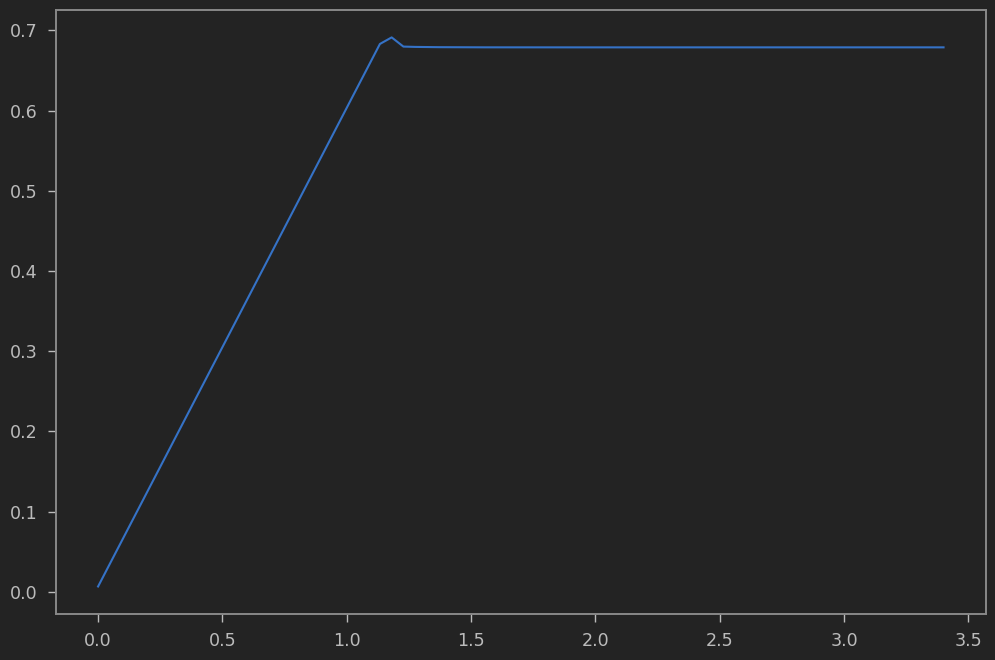

In [178]:

#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)

In [179]:
data_dict[str(loc)] = [capacity, V, Li]

Text(0, 0.5, 'Voltage [V]')

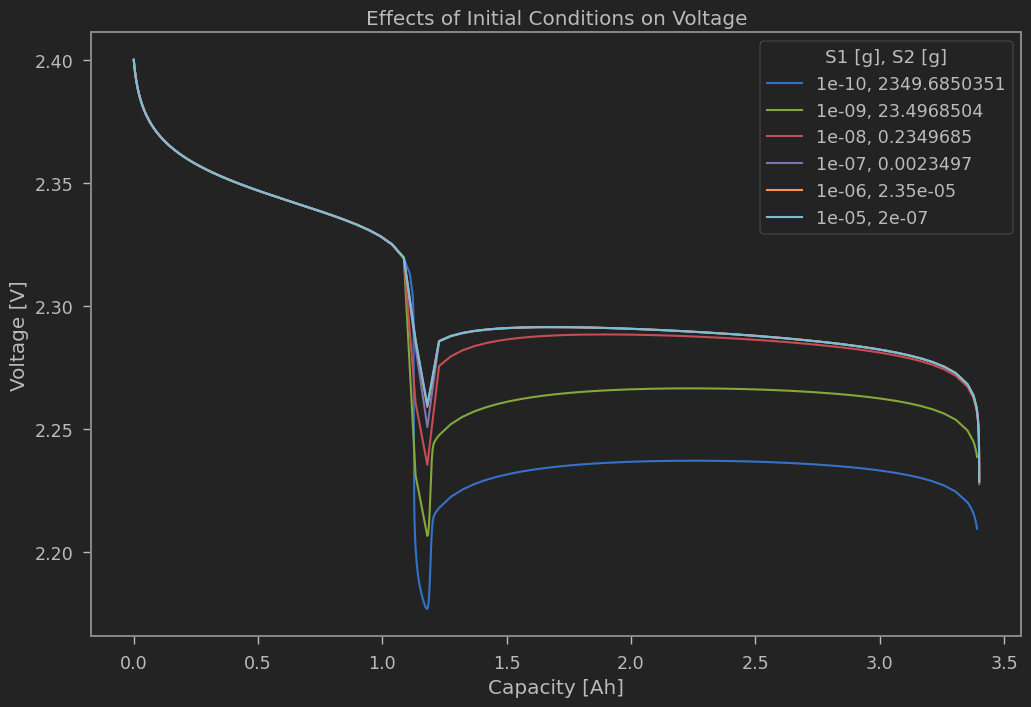

In [186]:
loc_list = [0,1,2,3,4,5]
legend = []
for loc in loc_list:
    c = data_dict[str(loc)][0]
    v = data_dict[str(loc)][1]
    plt.plot(c,v)
    legend.append(str(S1_trials[loc]) + ', ' + str(round(S2_list[loc],7)))
    
plt.legend(legend, title = 'S1 [g], S2 [g]')
plt.title("Effects of Initial Conditions on Voltage")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

Text(0, 0.5, 'Rescaled Li ion [g] (see documentation)')

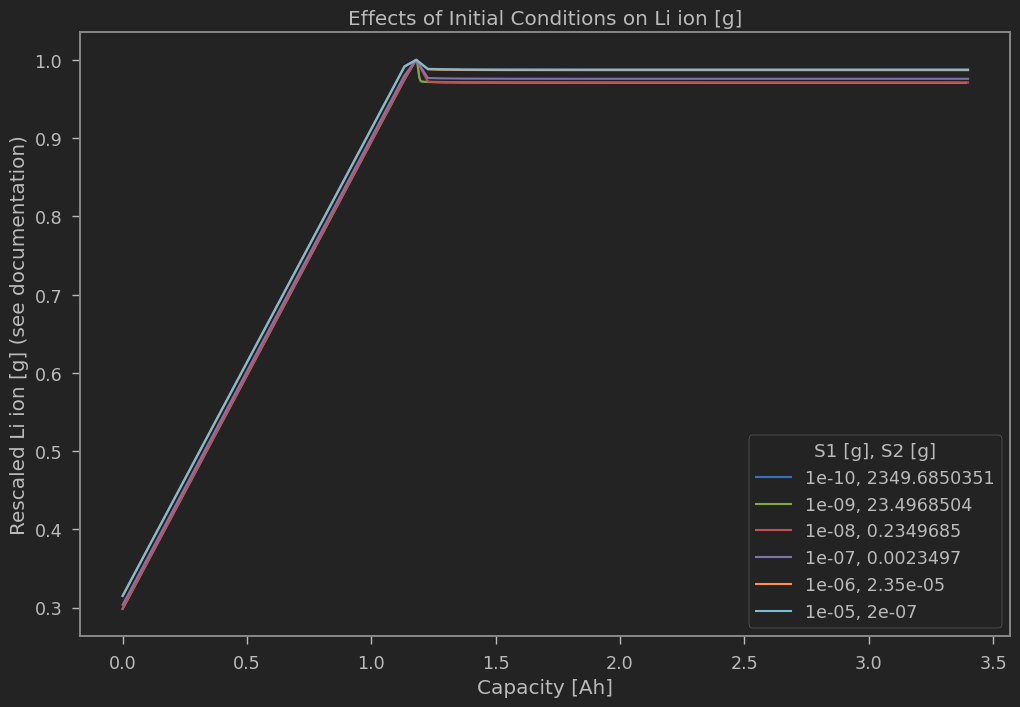

In [195]:
loc_list = [0,1,2,3,4,5]
legend = []
for loc in loc_list:
    c = data_dict[str(loc)][0]
    l = data_dict[str(loc)][2]
    plt.plot(c,l - max(l) + 1)
    legend.append(str(S1_trials[loc]) + ', ' + str(round(S2_list[loc],7)))
    
plt.legend(legend, title = 'S1 [g], S2 [g]')
plt.title("Effects of Initial Conditions on Li ion [g]")
plt.xlabel('Capacity [Ah]')
plt.ylabel('Rescaled Li ion [g] (see documentation)')

# Chemistry 4

In [303]:
Ms = 32
F = 9.649e4
V = 2.4
R = 8.3145
T = 298
ar = 0.960
I = 1.7
nu = 0.0114

f_l = (Ms*nu/2)**(1/2)
f_m = (Ms*nu)**(1/2)
f_h = (2*Ms*nu)**(1/4)

EL0 = 1.9
EM0 = 1.95
EH0 = 2.4


ih0 = 1
im0 = 1
il0 = 1
    

def S2_func(S4):
    constant = f_m*np.exp(F*(EM0-V)/(R*T))
    return constant*np.sqrt(S4)

def S1_func(S2):
    constant = f_l*np.exp(F*(EL0-V)/(R*T))
    return constant*np.sqrt(S2)

def S8_func(S4):
    S2 = S2_func(S4)
    return ((3600*3.4*Ms/F) - S2 - 1.5*S4)/2

def S4_root(S4):
    S8 = S8_func(S4)
    EH = EH0 + (R*T)*np.log(f_h*S8/(S4**2))/(F)
    eta_H = V - EH
    iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
    return I - iH

In [309]:
# First find the root for S8
S4 = root(S4_root, 1)
S4_initial = S4['x'][0]
S4_initial

0.5503764303265447

In [310]:
# Check root function is successful
S4_root(S4_initial)

1.1102230246251565e-14

In [311]:
# Second solve for S4 in terms of S8
S8_initial = S8_func(S4_initial)
S8_initial

1.6168580490060327

In [312]:
# Third solve for S2 in terms of S4
S2_initial = S2_func(S4_initial)
S2_initial

1.0980448049780229e-08

In [313]:
# check that V = EM0
EM0 + (R*T)*np.log(f_m*(S4_initial**(1/2))/S2_initial)/(F)

2.4

In [314]:
# capacity check
F*( S2_initial + 1.5*S4_initial + 2*S8_initial   )/(3600*Ms)

3.4000000000000004

In [315]:
# current check
EH = EH0 + (R*T)*np.log(f_h*S8_initial/(S4_initial**2))/(F)
eta_H = V - EH
iH = -2*ih0*ar*np.sinh(F*eta_H/(2*R*T))
iH

1.6999999999999889

In [316]:
# Fourth solve for S1 in terms of S2
S1_initial = S1_func(S2_initial)
S1_initial

1.5647598961123744e-13

In [317]:
# check that V = EM0
EL0 + (R*T)*np.log(f_l*(S2_initial**(1/2))/S1_initial)/(F)

2.4

In [318]:
model = pybamm.lithium_sulfur.ZeroD_Chemistry_4()

V_initial_dis = 2.4

param = model.default_parameter_values
param.update(
    {
        "Current function [A]": 1.7,
        "Initial Condition for Terminal Voltage [V]": 2.4,
        "Initial Condition for S8 ion [g]" : S8_initial,
        "Initial Condition for S4 ion [g]" : S4_initial,
        "Initial Condition for S2 ion [g]" : S2_initial,
        "Initial Condition for S ion [g]" : S1_initial,
        "Lower voltage cut-off [V]" : 1.5,
        "Standard Potential L [V]" : EL0,
        "Standard Potential M [V]" : EM0,
        "Standard Potential H [V]" : EH0,
        "Exchange current density L [A.m-2]": il0
        
        }
)


sim = pybamm.Simulation(
    model,
    #experiment=experiment,
    parameter_values = param,
    solver=pybamm.CasadiSolver(
        atol=1e-6,
        rtol=1e-3,
        dt_max = .01,
        extra_options_setup={"max_step_size": 0.1}, 
        max_step_decrease_count = 15,
    ),
)
hours = 4.8
time_in_seconds = 100#3500#16950#3600*hours
sim.solve(np.linspace(0, time_in_seconds, int(time_in_seconds)))

psetup failed: .../casadi/interfaces/sundials/idas_interface.cpp:849: Calculating Jacobian failed


In [323]:
time = 10*3600/1.7

condition = True 
while condition:
    try:
        sim.step(100)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(50)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(10)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

condition = True 
while condition:
    try:
        sim.step(1)
        if sim.solution.t[-1] > time:
            condition = False
    except:
        condition = False

CasADi - 2021-05-24 19:07:52 WARNING("roots:jac_f_z failed: NaN detected for output jac_x_x0, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2021-05-24 19:07:52 WARNING("roots:jac_f_z failed: NaN detected for output jac_x_x0, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2021-05-24 19:07:52 WARNING("roots:jac_f_z failed: NaN detected for output jac_x_x0, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]
CasADi - 2021-05-24 19:07:52 WARNING("roots:jac_f_z failed: NaN detected for output jac_x_x0, at (row 0, col 0).") [.../casadi/core/oracle_function.cpp:265]


Text(0, 0.5, 'Voltage [V]')

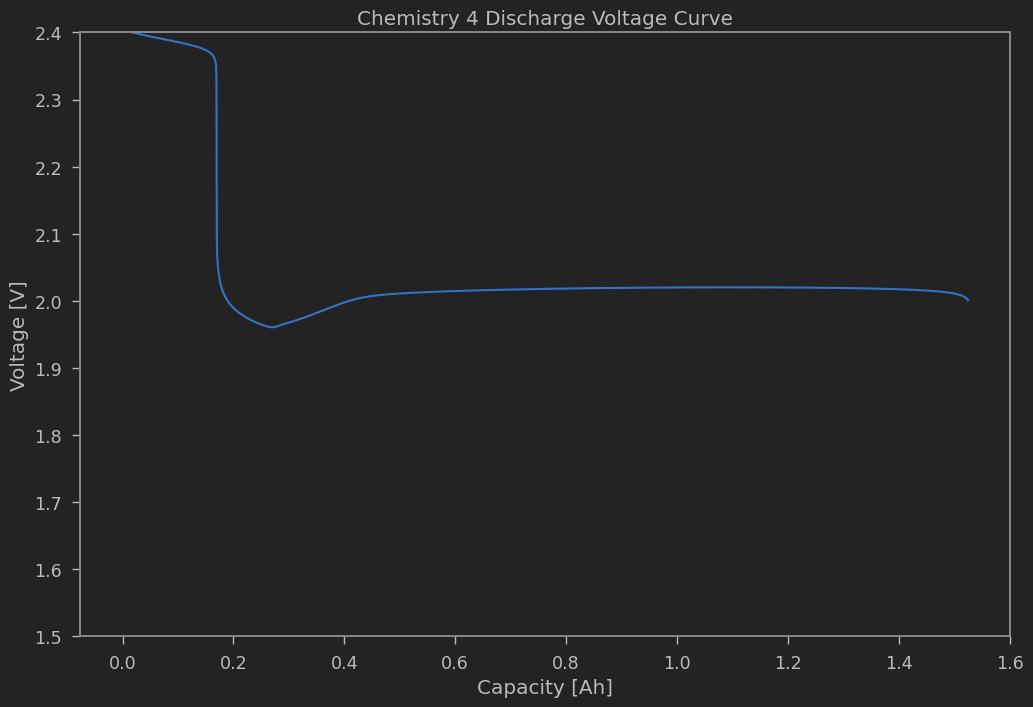

In [324]:
capacity = 1.7*sim.solution.t/3600
V = sim.solution["Terminal voltage [V]"].entries
plt.plot(capacity, V)
#plt.xlim([0,3.5])
plt.ylim([1.5,2.4])
plt.title('Chemistry 4 Discharge Voltage Curve')
plt.xlabel('Capacity [Ah]')
plt.ylabel('Voltage [V]')

Text(0, 0.5, 'Li ion [g]')

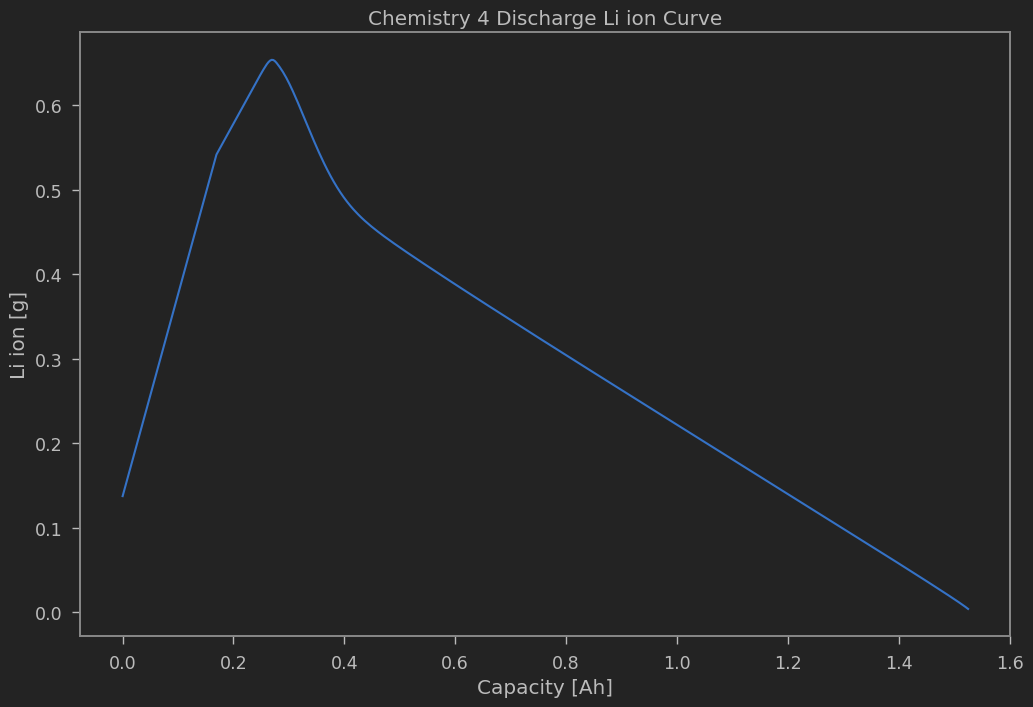

In [327]:
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 

plt.plot(capacity, Li)
plt.title('Chemistry 4 Discharge Li ion Curve')
plt.xlabel('Capacity [Ah]')
plt.ylabel('Li ion [g]')

Text(0.5, 1.0, 'Chemistry 4 Discharge Unfitting Resistance Curve')

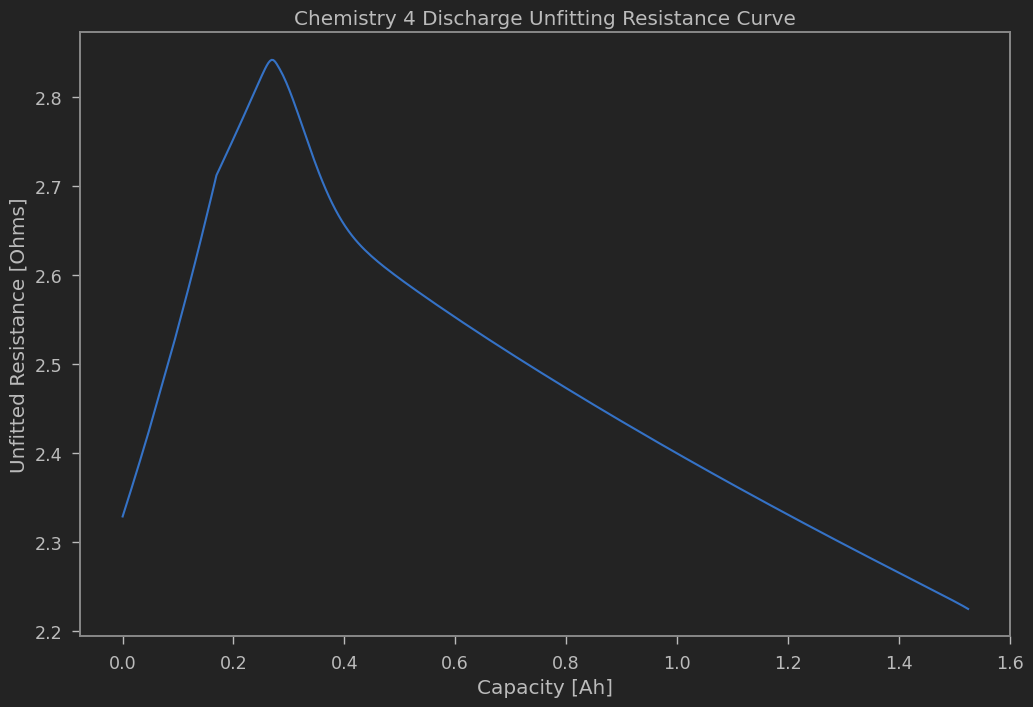

In [328]:
sigma_0 = 3
l =  1
A = 0.15

capacity = 1.7*sim.solution.t/3600
#S6 = sim.solution['S6 [g]'].entries
S4 = sim.solution['S4 [g]'].entries
S2 = sim.solution['S2 [g]'].entries
S1 = sim.solution['S [g]'].entries
Li = S1 + 0.5*S2 + 0.25*S4 
b = 1
sigma = sigma_0 - b*(Li)
R = l/(A*sigma)
plt.plot(capacity,R)
plt.xlabel('Capacity [Ah]')
plt.ylabel('Unfitted Resistance [Ohms]')
plt.title('Chemistry 4 Discharge Unfitting Resistance Curve')